## 텍스트 마이닝 실습

## 빈도분석

In [ ]:
# 필요한 모듈 임포트
from collections import Counter

# 텍스트 데이터 예제
text = "텍스트 분석은 흥미로운 주제입니다. 텍스트 분석은 텍스트 데이터에서 정보를 추출하는 기술입니다."

# 텍스트를 소문자로 변환
text = text.lower()

# 텍스트를 단어로 분할
words = text.split()

# 단어 빈도수 계산
word_count = Counter(words)

# 결과 출력
print(word_count)


Counter({'텍스트': 3, '분석은': 2, '흥미로운': 1, '주제입니다.': 1, '데이터에서': 1, '정보를': 1, '추출하는': 1, '기술입니다.': 1})


In [ ]:
!pip install textblob

## 감정분석

In [ ]:
from textblob import TextBlob

# 텍스트 데이터 예제
text = "이 영화는 정말로 훌륭하고 감동적이었습니다."

# TextBlob 객체 생성
blob = TextBlob(text)

# 감정 분석 수행
sentiment = blob.sentiment

# 결과 출력
print(sentiment)

# 감정 점수 출력
polarity = sentiment.polarity  # 감정의 극성 (-1부터 1까지의 값, -1은 부정, 1은 긍정)
subjectivity = sentiment.subjectivity  # 주관성 (0부터 1까지의 값, 0은 객관적, 1은 주관적)

# 결과 해석
if polarity > 0:
    sentiment_label = "긍정적인 감정"
elif polarity < 0:
    sentiment_label = "부정적인 감정"
else:
    sentiment_label = "중립적인 감정"

print(f"감정 점수 (극성): {polarity}")
print(f"주관성: {subjectivity}")
print(f"감정 분석 결과: {sentiment_label}")


Sentiment(polarity=0.0, subjectivity=0.0)
감정 점수 (극성): 0.0
주관성: 0.0
감정 분석 결과: 중립적인 감정


## 토픽 모델링

In [14]:
# 필요한 라이브러리 가져오기
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize

# 예시 뉴스 기사 데이터
documents = ["스포츠 뉴스: 리버풀은 맨체스터 시티에 2-1로 승리",
             "경제 뉴스: 금리 인상에 주식 시장이 하락했다",
             "정치 뉴스: 대통령이 새로운 정책을 발표했다",
             "스포츠 뉴스: 농구 대표팀이 세계 대회에서 우승했다"]

# 텍스트 전처리: 토큰화
tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]

# 사전 생성 (단어 - ID 매핑)
dictionary = corpora.Dictionary(tokenized_documents)

# 문서-단어 매트릭스 생성 (Bag of Words 표현)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# LDA 모델 생성
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# 토픽 출력
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)


(0, '0.089*"뉴스" + 0.089*":" + 0.054*"스포츠"')
(1, '0.093*":" + 0.093*"뉴스" + 0.056*"스포츠"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 워드 클라우드

In [1]:
!pip install wordcloud
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 32.5 MB/s eta 0:00:00


In [2]:
# 필요한 라이브러리 임포트
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt

# 한글 텍스트 데이터 생성 (예시)
korean_text = "한글 텍스트 데이터 예제입니다. 한글로 된 텍스트를 워드 클라우드로 시각화해봅시다."

# 텍스트 데이터에서 명사 추출
okt = Okt()
nouns = okt.nouns(korean_text)

# 명사 리스트를 공백으로 연결하여 텍스트로 변환
text = ' '.join(nouns)

# WordCloud 객체 생성
wordcloud = WordCloud(font_path="your_font_file.ttf",
                      background_color="white").generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


OSError: cannot open resource

In [2]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /root/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

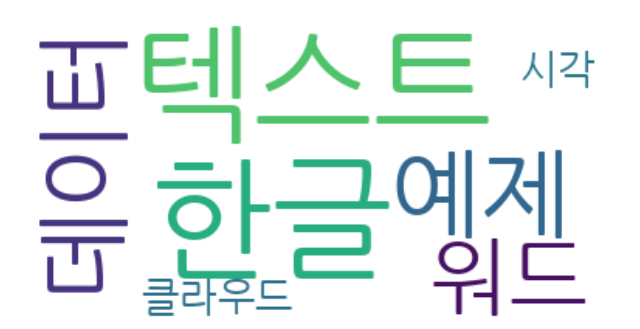

In [3]:
# 필요한 라이브러리 임포트
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt

# 한글 텍스트 데이터 생성 (예시)
korean_text = "한글 텍스트 데이터 예제입니다. 한글로 된 텍스트를 워드 클라우드로 시각화해봅시다."

# 텍스트 데이터에서 명사 추출
okt = Okt()
nouns = okt.nouns(korean_text)

# 명사 리스트를 공백으로 연결하여 텍스트로 변환
text = ' '.join(nouns)

# WordCloud 객체 생성 (폰트 설정 추가)
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf", background_color="white").generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
